In [1]:
!pip install pandas matplotlib seaborn openpyxl scipy



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind


In [10]:
df = pd.read_excel("FEV-data-Excel.xlsx")


In [11]:
# Filter cars within budget and range
filtered_df = df[(df['Minimal price (gross) [PLN]'] <= 350000) & 
                 (df['Range (WLTP) [km]'] >= 400)]

# Group by Make and calculate average battery capacity
grouped_by_make = filtered_df.groupby('Make')
avg_battery = grouped_by_make['Battery capacity [kWh]'].mean()
avg_battery


Make
Audi             95.000000
BMW              80.000000
Hyundai          64.000000
Kia              64.000000
Mercedes-Benz    80.000000
Tesla            68.000000
Volkswagen       70.666667
Name: Battery capacity [kWh], dtype: float64

In [12]:
q1 = df['mean - Energy consumption [kWh/100 km]'].quantile(0.25)
q3 = df['mean - Energy consumption [kWh/100 km]'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df['mean - Energy consumption [kWh/100 km]'] < lower_bound) | 
              (df['mean - Energy consumption [kWh/100 km]'] > upper_bound)]

outliers[['Car full name', 'Make', 'mean - Energy consumption [kWh/100 km]']]


,Car full name,Make,mean - Energy consumption [kWh/100 km]


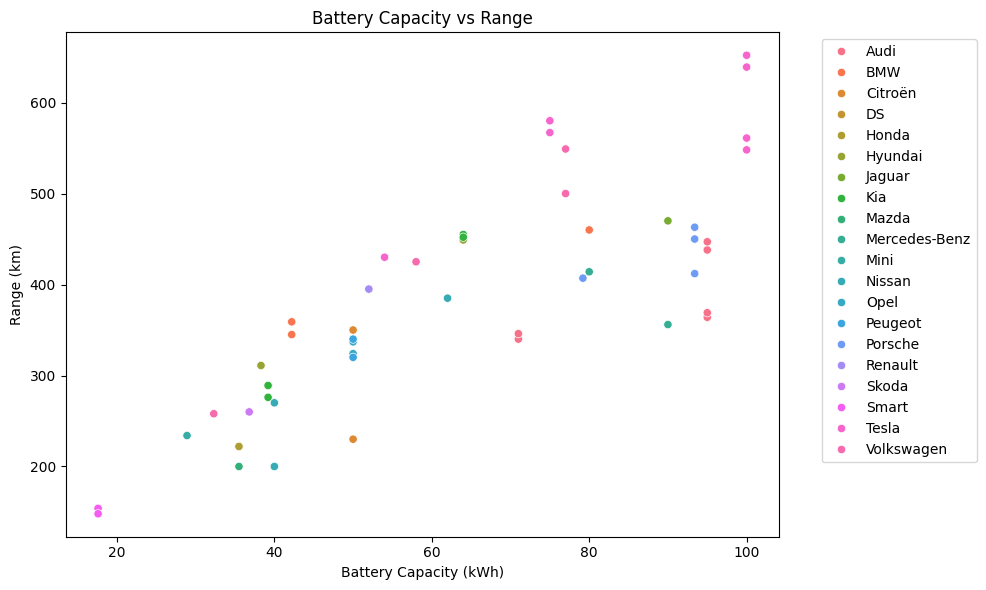

Correlation: 0.8104385771936846


In [13]:
# Plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Battery capacity [kWh]', y='Range (WLTP) [km]', hue='Make')
plt.title("Battery Capacity vs Range")
plt.xlabel("Battery Capacity (kWh)")
plt.ylabel("Range (km)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Correlation
correlation = df['Battery capacity [kWh]'].corr(df['Range (WLTP) [km]'])
print("Correlation:", correlation)


In [14]:
class EVRecommender:
    def __init__(self, data):
        self.data = data

    def recommend(self, budget, min_range, min_battery):
        filtered = self.data[
            (self.data['Minimal price (gross) [PLN]'] <= budget) &
            (self.data['Range (WLTP) [km]'] >= min_range) &
            (self.data['Battery capacity [kWh]'] >= min_battery)
        ]
        return filtered.sort_values(by='Range (WLTP) [km]', ascending=False).head(3)

# Example usage
recommender = EVRecommender(df)
recommender.recommend(300000, 400, 60)


,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
40,Tesla Model 3 Long Range,Tesla,Model 3 Long Range,235490,372,510,disc (front + rear),4WD,75.0,580,...,NaN,NaN,5,5,18,233,425.0,4.4,150,NaN
41,Tesla Model 3 Performance,Tesla,Model 3 Performance,260490,480,639,disc (front + rear),4WD,75.0,567,...,NaN,NaN,5,5,20,261,425.0,3.3,150,NaN
48,Volkswagen ID.3 Pro S,Volkswagen,ID.3 Pro S,179990,204,310,disc (front) + drum (rear),2WD (rear),77.0,549,...,2280.0,412.0,5,5,19,160,385.0,7.9,125,15.9


In [15]:
tesla = df[df['Make'] == 'Tesla']['Engine power [KM]']
audi = df[df['Make'] == 'Audi']['Engine power [KM]']

result = ttest_ind(tesla, audi, equal_var=False)
print("t-statistic:", result.statistic)
print("p-value:", result.pvalue)

if result.pvalue < 0.05:
    print("Significant difference in engine power.")
else:
    print("No significant difference.")


t-statistic: 1.7939951827297178
p-value: 0.10684105068839565
No significant difference.
